### Дипломная работа по курсу «Python для анализа данных»

**Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.**

**Признаки:**

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [1]:
import pandas as pd
import numpy as np
import math
import missingno as msno
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

In [2]:
df_hr = pd.read_csv("HR.csv")

In [3]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)**

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df_hr.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
def my_basic_research_for_df(df, column):
    row = [column, 
           df[column].mean(), 
           df[column].var(), 
           df[column].median(), 
           np.percentile(df[column], 75), 
           np.percentile(df[column], 99) , 
           df[column].mode()[0]]
    return(row)

In [8]:
df_hr_not_category= df_hr[['satisfaction_level', 
                      'last_evaluation', 
                      'number_project', 
                      'average_montly_hours',
                     'time_spend_company',
                     ]]

In [9]:
list=[]
for column in df_hr_not_category.columns:
    list.append(my_basic_research_for_df(df=df_hr_not_category, column=column))
df_stat = pd.DataFrame(list,  columns = ['metrics', 'mean', 'var', '50%', '75%', '99%', 'mode'])
df_stat.set_index(['metrics'], inplace=True)
df_stat

,mean,var,50%,75%,99%,mode
metrics,,,,,,
satisfaction_level,0.612834,0.061817,0.64,0.82,0.99,0.10
last_evaluation,0.716102,0.029299,0.72,0.87,1.00,0.55
number_project,3.803054,1.519284,4.00,5.00,7.00,4.00
average_montly_hours,201.050337,2494.313175,200.00,245.00,301.00,135.00
time_spend_company,3.498233,2.131998,3.00,4.00,10.00,3.00


**Рассчитать и визуализировать корреляционную матрицу для количественных переменных**

In [10]:
corr_m = df_hr.corr()
corr_m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


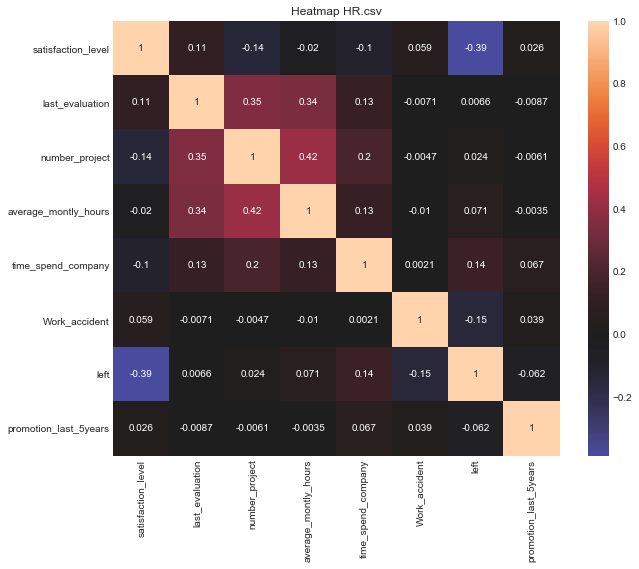

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_m, center=0, annot=True)
plt.title('Heatmap HR.csv')
plt.show()

**Определите две самые скоррелированные и две наименее скоррелированные переменные**.

Кто больше работает(среднее количество часов на рабочем месте в месяц), у того большее количество проектов (прямая зависимость, по шкале Чеддока умеренная положительная корреляция), почти  в той же степени связаны с количеством проектов время с момента последней оценки в годах и время с момента последней оценки в годах и среднее количество часов на рабочем месте в месяц, и есть умеренная отрицательная корреляция между уровнем удовлетворенности и тем уволился человек или нет, чем ниже уровень удовлетворенности тем больше вероятность что он покинет компанию.

Наименее связанные друг с другом величины среднее количество часов на рабочем месте в месяц и повышался ли сотрудник за последние пять лет

**Рассчитать сколько работников работает в каждом департаменте**

In [12]:
df_hr.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

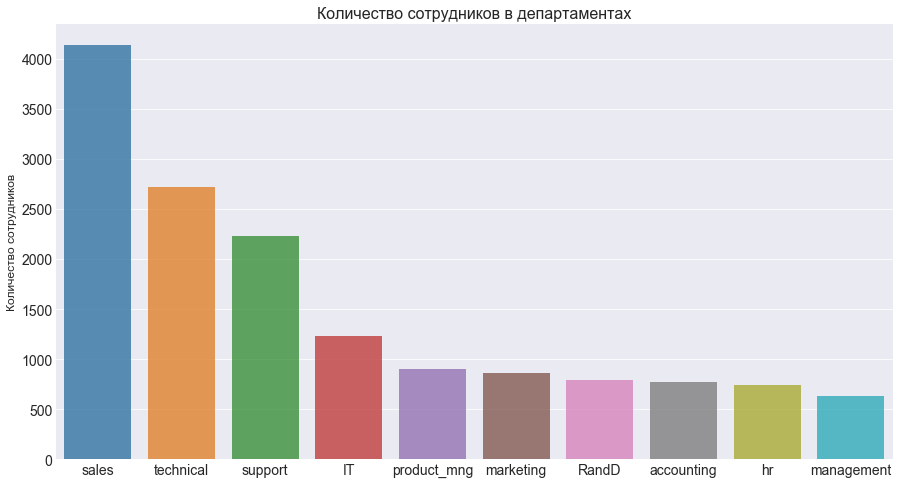

In [13]:
plt.figure(figsize=(15,8))
plt.title("Количество сотрудников в департаментах", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(x=df_hr.department.value_counts().index, y=df_hr.department.value_counts().values, alpha=0.8)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.show()

**Показать распределение сотрудников по зарплатам**

In [14]:
df_hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

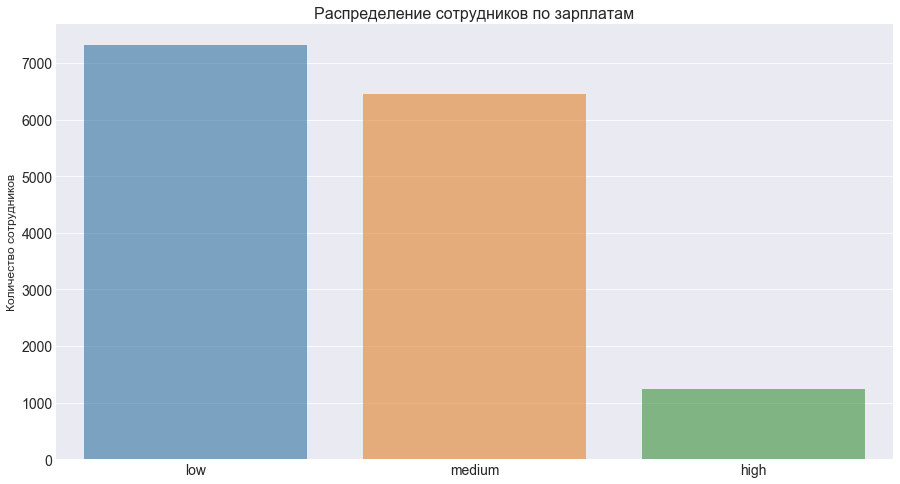

In [15]:
plt.figure(figsize=(15,8))
plt.title("Распределение сотрудников по зарплатам", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(x=df_hr.salary.value_counts().index, y=df_hr.salary.value_counts().values, alpha=0.6)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.show()

**Показать распределение сотрудников по зарплатам совместно с департаментами**

In [16]:
df_hr.groupby(['department'])['salary'].value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

In [17]:
# для визуализации применим несколько другую группировку
staff_salary_of_dep = df_hr.groupby(['department', 'salary'])['left'].count().reset_index()
depart_list = df_hr.department.unique().tolist()


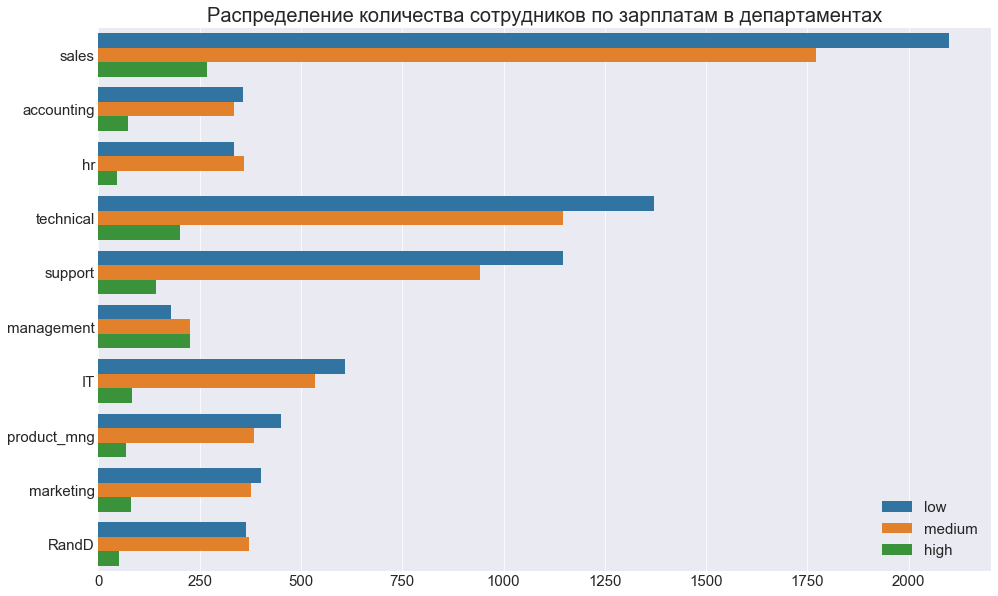

In [18]:
plt.figure(figsize=(16,10))
plt.title("Распределение количества сотрудников по зарплатам в департаментах", fontsize=20)
plt.tick_params(labelsize=15)

sns.barplot(x='left', y="department", hue='salary', order=depart_list,\
            hue_order=['low', 'medium', 'high'],\
            data=staff_salary_of_dep).set(ylabel=None, xlabel=None)
plt.legend(fontsize=15)
plt.show()

**Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

In [19]:
df_hr.groupby(['salary'])['average_montly_hours'].agg(['min', 'mean', 'max']).reset_index()


,salary,min,mean,max
0,high,96,199.867421,307
1,low,96,200.996583,310
2,medium,96,201.338349,310


Гипотеза не подтвердилась, больше времени на рабочем месте, по данным статистики, проводят сотрудники со средней зарплатой

**Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**
 
- Доля сотрудников с повышением за последние 5 лет

In [20]:
df_hr.groupby(['left'])['promotion_last_5years'].value_counts()

left  promotion_last_5years
0     0                        11128
      1                          300
1     0                         3552
      1                           19
Name: promotion_last_5years, dtype: int64

In [21]:
per_promout_left = df_hr.loc[(df_hr.left==1) & (df_hr.promotion_last_5years ==1)].left.count()\
                    /df_hr.loc[(df_hr.left==1) & (df_hr.promotion_last_5years !=1)].left.count()
per_promout_stay = df_hr.loc[(df_hr.left!=1) & (df_hr.promotion_last_5years ==1)].left.count()\
                    /df_hr.loc[(df_hr.left!=1) & (df_hr.promotion_last_5years !=1)].left.count()

In [22]:
print("Доля сотрудников с повышением за последние 5 лет среди уволившихся {:%}".format(float(per_promout_left)))
print("Доля сотрудников с повышением за последние 5 лет среди работающих {:%}".format(float(per_promout_stay)))

Доля сотрудников с повышением за последние 5 лет среди уволившихся 0.534910%
Доля сотрудников с повышением за последние 5 лет среди работающих 2.695902%


- Средняя степень удовлетворенности

In [23]:
df_hr.groupby(['left'])['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [24]:
print(f"Средняя степень удовлетворенности среди уволившихся {float(df_hr[df_hr.left!=0].groupby(['left'])['satisfaction_level'].mean())}")
print(f"Средняя степень удовлетворенности среди работающих {float(df_hr[df_hr.left==0].groupby(['left'])['satisfaction_level'].mean())}")

Средняя степень удовлетворенности среди уволившихся 0.44009801176140917
Средняя степень удовлетворенности среди работающих 0.666809590479516


 - Среднее количество проектов

In [25]:
df_hr.groupby(['left'])['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

In [26]:
print(f"Среднее количество проектов среди уволившихся {float(df_hr[df_hr.left!=0].groupby(['left'])['number_project'].mean())}")
print(f"Среднее количество проектов среди работающих {float(df_hr[df_hr.left==0].groupby(['left'])['number_project'].mean())}")

Среднее количество проектов среди уволившихся 3.8555026603192384
Среднее количество проектов среди работающих 3.786664333216661


**Вывод:** Работники не довольны, что они ведут много проектов, при этом они не имеют практически никакого поощрения за свой труд, их практически не повышают даже за выслугу лет, поэтому степень разочарования растет и работники увольняются.

**Сколько сотрудников покинули компанию**

In [27]:
int(df_hr[df_hr.left==1].left.value_counts().values)

3571

**Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборке**

In [29]:
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [31]:
data= df_hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years']]

In [41]:
data_class = df_hr['left'].to_numpy()
data_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [36]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
lda = LinearDiscriminantAnalysis()

In [44]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [45]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [47]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [48]:
# оцениваем точность

from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, lda.predict(X_test))

0.7634666666666666

что говорит о том, что мы можем предсказать вероятность увольнения с точностью 76%